In [43]:
from ff_energy.ffe.utils import get_structures
import dscribe
import matplotlib.pyplot as plt
from ase.visualize import view
from ff_energy.projections.dscribe_utils import soap, soap_dist
from ff_energy.ffe.utils import pickle_output
import pandas as pd
import numpy as np

In [7]:
structures, pdbs = get_structures("water_tests", pdbpath="/home/boittier/Documents/phd/ff_energy/pdbs/water_tests/")

5joo_1.pdb
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8]
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8]
** 0 TIP3 O
** 1 TIP3 H1
** 2 TIP3 H2
** 3 TIP3 O
** 4 TIP3 H1
** 5 TIP3 H2
** 6 TIP3 O
** 7 TIP3 H1
** 8 TIP3 H2
** 9 TIP3 O
** 10 TIP3 H1
** 11 TIP3 H2
** 12 TIP3 O
** 13 TIP3 H1
** 14 TIP3 H2
** 15 TIP3 O
** 16 TIP3 H1
** 17 TIP3 H2
** 18 TIP3 O
** 19 TIP3 H1
** 20 TIP3 H2
** 21 TIP3 O
** 22 TIP3 H1
** 23 TIP3 H2
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8]
2fgr_1.pdb
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12]
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12]
** 0 TIP3 O
** 1 TIP3 H1
** 2 TIP3 H2
** 3 TIP3 O
** 4 TIP3 H1
** 5 TIP3 H2
** 6 TIP3 O
** 7 TIP3 H1
** 8 TIP3 H2
** 9 TIP3 O
** 10 TIP3 H1
** 11 TIP3 H2
** 12 TIP3 O
** 13 TIP3 H1
** 14 TIP3 H2
** 15 TIP3

In [8]:
structures2, pdbs2 = get_structures("pdbs4", pdbpath="/home/boittier/Documents/phd/ff_energy/pdbs/pdbs4/")

Structure/PDB already already exists, loading from pickle


In [9]:
atoms = [_.get_ase() for _ in structures]

In [10]:
atoms2 = [_.get_ase() for _ in structures2]

In [11]:
len(atoms2)

500

In [61]:
# view(atoms[4], viewer="x3d")

In [13]:
# view(atoms[1], viewer="x3d")

In [14]:
atoms_all = atoms.copy()

In [15]:
soap_avg = soap(average="inner")

In [16]:
test_soaps = soap_avg.create(atoms)

In [17]:
atoms_all.extend(atoms2)
test_soaps_test4 = soap_avg.create(atoms_all)

In [18]:
test_soaps.shape

(6, 952)

In [19]:
test_soaps_test4.shape

(506, 952)

In [20]:
flat_soaps = test_soaps.flatten()
flat_soaps.shape

(5712,)

In [21]:
names = pdbs.copy()
names.extend(pdbs2)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [23]:
pca.fit(test_soaps_test4)

PCA(n_components=2)

In [24]:
print(pca.explained_variance_ratio_)

[0.9894862 0.0074932]


In [25]:
pdbs
# ion channel
# membrane
# aquaporin
# aquaporin
# ion channel
# ion channel

['5joo_1.pdb',
 '2fgr_1.pdb',
 '3hd6_1.pdb',
 '3zoj.pdb',
 '6hzw_1.pdb',
 '1ug7_1.pdb']

Text(0, 0.5, 'PCA2 (0.01)')

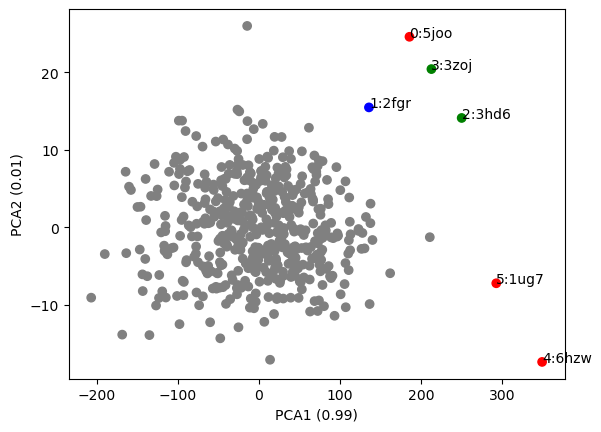

In [26]:
c=["red", "blue", "green", "green", "red", "red",]
c.extend(["gray"]*500)
transX = pca.transform(test_soaps_test4)
plt.scatter(transX[:,0], transX[:,1], c=c)
for i, ((x,y),l) in list(enumerate(zip(transX, pdbs)))[:6]:
    plt.text(x,y,f"{i}:{l}"[:6])
plt.xlabel("PCA1 ({:.2f})".format(pca.explained_variance_ratio_[0]))
plt.ylabel("PCA2 ({:.2f})".format(pca.explained_variance_ratio_[1]))

In [27]:
pca_df = pd.DataFrame(transX, index = names)
pca_df["i"] = range(len(transX))
pca_df["dist"] = pca_df.apply(lambda r: np.sqrt((r[0] - r[1])**2), axis=1)
pca_df["class"] = ["md" if "test" in _ else "pdb" for _ in pca_df.index]

In [28]:
pca_df.sort_values("dist")

,0,1,i,dist,class
test452.xyz.pdb,7.949042,7.823760,292,0.125282,md
test67.xyz.pdb,-5.087854,-5.632531,454,0.544677,md
test153.xyz.pdb,3.248292,2.506403,262,0.741889,md
test181.xyz.pdb,-3.922834,-4.701282,15,0.778448,md
test467.xyz.pdb,-11.185626,-10.355737,19,0.829889,md
...,...,...,...,...,...
test68.xyz.pdb,-206.869048,-9.067679,287,197.801369,md
test73.xyz.pdb,210.749644,-1.261207,68,212.010851,md
3hd6_1.pdb,250.056875,14.124480,2,235.932394,pdb
1ug7_1.pdb,292.723381,-7.208897,5,299.932279,pdb


In [29]:
# view(atoms_all[287], viewer="x3d")

In [30]:
# view(atoms_all[68], viewer="x3d")

In [31]:
# view(atoms_all[292], viewer="x3d")

In [33]:
from ase.calculators.dftb import Dftb
from xtb.ase.calculator import XTB

calc = XTB(
    #method="GFN1-xTB", #for dibridged Si2H2
    label="calc_folder",
    charge=0.0,
    magmom=0)


In [34]:
for i in range(len(atoms_all)):
    atoms_all[i].set_calculator(calc)

In [35]:
pot_energy = [_.get_potential_energy() for _ in atoms_all]

In [45]:
pickle_output( pot_energy , "XTB_potentials",)


In [36]:
dipoles = [np.linalg.norm(_.get_dipole_moment()) for _ in atoms_all]

In [ ]:
pickle_output( pot_energy , "XTB_potentials",)

In [54]:
atoms_all[0].get_center_of_mass()

array([ 14.3671168 , -12.50240468, -27.0387913 ])

In [56]:
atoms_all[0].get_moments_of_inertia()

array([ 513.90087849, 2353.08669503, 2627.62146823])

In [57]:
moments_of_inertia = [np.linalg.norm(_.get_moments_of_inertia()) for _ in atoms_all]

Text(0, 0.5, 'PCA2 (0.01)')

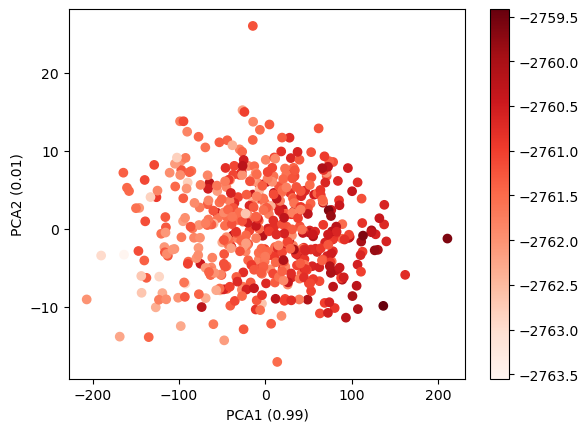

In [90]:
skip = 6
s = plt.scatter(transX[:,0][skip:], transX[:,1][skip:], c=pot_energy[skip:], cmap="Reds")
plt.colorbar(s)
# for i, ((x,y),l) in list(enumerate(zip(transX, pdbs)))[:6]:
#     plt.text(x,y,f"{i}:{l}"[:6])
plt.xlabel("PCA1 ({:.2f})".format(pca.explained_variance_ratio_[0]))
plt.ylabel("PCA2 ({:.2f})".format(pca.explained_variance_ratio_[1]))

Text(0, 0.5, 'PCA2 (0.01)')

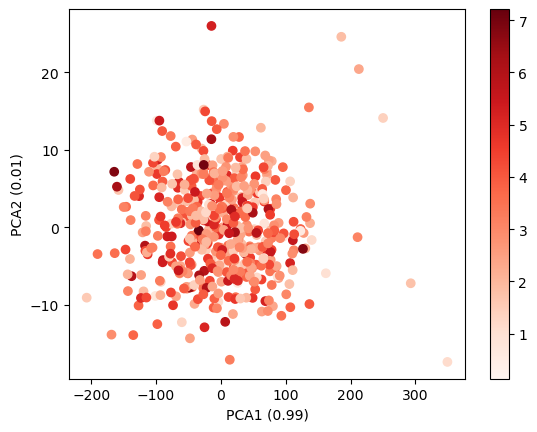

In [91]:
skip = 0
s = plt.scatter(transX[:,0][skip:], transX[:,1][skip:], c=dipoles[skip:], cmap="Reds")
plt.colorbar(s)
# for i, ((x,y),l) in list(enumerate(zip(transX, pdbs)))[:6]:
#     plt.text(x,y,f"{i}:{l}"[:6])
plt.xlabel("PCA1 ({:.2f})".format(pca.explained_variance_ratio_[0]))
plt.ylabel("PCA2 ({:.2f})".format(pca.explained_variance_ratio_[1]))

Text(0, 0.5, 'PCA2 (0.01)')

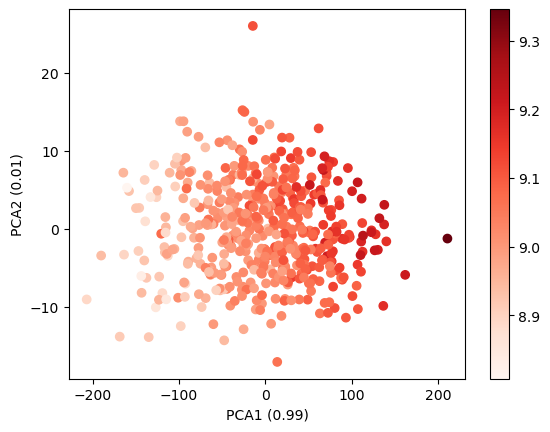

In [94]:
skip = 6
s = plt.scatter(transX[:,0][skip:], transX[:,1][skip:], c=np.log(moments_of_inertia[skip:]), cmap="Reds")
plt.colorbar(s)
# for i, ((x,y),l) in list(enumerate(zip(transX, pdbs)))[:6]:
#     plt.text(x,y,f"{i}:{l}"[:6])
plt.xlabel("PCA1 ({:.2f})".format(pca.explained_variance_ratio_[0]))
plt.ylabel("PCA2 ({:.2f})".format(pca.explained_variance_ratio_[1]))

In [103]:
dists = soap_dist(test_soaps_test4)

In [104]:
dists.shape

(506, 506)

In [112]:
from scipy.spatial.distance import pdist, squareform
sqfm = squareform(dists)

In [127]:
Z = hierarchy.linkage(sqfm, 'single')

In [128]:
Z

array([[  31.        ,  129.        ,    1.48430107,    2.        ],
       [  28.        ,  454.        ,    1.5166026 ,    2.        ],
       [ 202.        ,  487.        ,    1.60615005,    2.        ],
       ...,
       [   2.        , 1007.        ,   40.39772227,  504.        ],
       [   5.        , 1008.        ,   47.84261835,  505.        ],
       [   4.        , 1009.        ,   58.86707035,  506.        ]])

In [130]:
from scipy.cluster import hierarchy

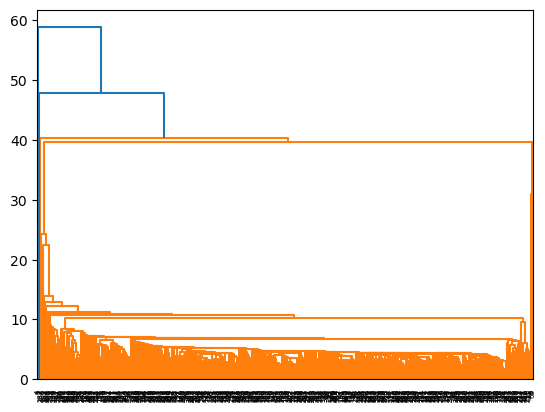

In [131]:
dn = hierarchy.dendrogram(Z)

In [132]:
Z.shape

(505, 4)

In [133]:
z_df = pd.DataFrame(Z)

In [136]:
z_df

,0,1,2,3
0,31.0,129.0,1.484301,2.0
1,28.0,454.0,1.516603,2.0
2,202.0,487.0,1.606150,2.0
3,15.0,507.0,1.637620,3.0
4,18.0,463.0,1.760330,2.0
...,...,...,...,...
500,0.0,1005.0,30.922744,3.0
501,1004.0,1006.0,39.683283,503.0
502,2.0,1007.0,40.397722,504.0
503,5.0,1008.0,47.842618,505.0


In [123]:
pd.DataFrame(dists)

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,0.000000,51.311244,65.684879,30.922744,170.279777,112.087294,323.120169,146.586852,276.589223,177.342988,...,244.939446,119.272263,151.342759,280.838242,319.469347,81.643722,100.585399,117.244431,169.314447,116.470777
1,51.311244,0.000000,115.214451,79.070526,217.845270,159.380582,272.421340,95.630907,226.275445,126.537835,...,194.052924,69.177611,100.437351,230.613903,268.961608,30.980822,50.942015,66.887094,118.380256,65.511818
2,65.684879,115.214451,0.000000,40.397722,105.063394,47.842618,386.395067,209.337799,340.931331,241.107650,...,308.221454,180.341644,215.000737,345.230017,383.532582,144.444371,161.715967,178.505711,232.155018,179.070311
3,30.922744,79.070526,40.397722,0.000000,143.511638,85.961393,349.960244,173.440195,303.943248,204.503823,...,271.813827,145.414566,178.552836,308.246986,346.635045,108.788375,126.855173,143.380803,196.129152,143.310669
4,170.279777,217.845270,105.063394,143.511638,0.000000,58.867070,485.139613,308.924128,441.758990,341.632459,...,407.453486,278.759551,315.657411,446.130434,483.666898,245.443832,260.745136,277.165453,331.550613,279.059922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,81.643722,30.980822,144.444371,108.788375,245.443832,187.213033,242.672923,65.297545,197.396734,97.041947,...,164.315551,38.430506,70.957878,201.740461,239.841044,0.000000,20.681869,36.222454,88.141882,34.981613
502,100.585399,50.942015,161.715967,126.855173,260.745136,202.943119,225.997132,48.675547,182.292876,81.845131,...,147.874793,18.883170,56.473277,186.641673,224.176942,20.681869,0.000000,17.392976,71.427503,19.745479
503,117.244431,66.887094,178.505711,143.380803,277.165453,219.522656,209.204611,32.304447,166.028242,65.810889,...,131.048609,3.714605,41.098271,170.456745,207.582201,36.222454,17.392976,0.000000,54.807395,9.063663
504,169.314447,118.380256,232.155018,196.129152,331.550613,273.953649,154.751601,23.259169,111.388924,14.072928,...,76.510374,53.388061,20.056418,115.831484,152.836837,88.141882,71.427503,54.807395,0.000000,53.417917


In [117]:
pd.DataFrame(dists, columns=names, index=names)

,5joo_1.pdb,2fgr_1.pdb,3hd6_1.pdb,3zoj.pdb,6hzw_1.pdb,1ug7_1.pdb,test306.xyz.pdb,test324.xyz.pdb,test18.xyz.pdb,test105.xyz.pdb,...,test415.xyz.pdb,test115.xyz.pdb,test95.xyz.pdb,test264.xyz.pdb,test417.xyz.pdb,test460.xyz.pdb,test64.xyz.pdb,test81.xyz.pdb,test8.xyz.pdb,test129.xyz.pdb
5joo_1.pdb,0.000000,51.311244,65.684879,30.922744,170.279777,112.087294,323.120169,146.586852,276.589223,177.342988,...,244.939446,119.272263,151.342759,280.838242,319.469347,81.643722,100.585399,117.244431,169.314447,116.470777
2fgr_1.pdb,51.311244,0.000000,115.214451,79.070526,217.845270,159.380582,272.421340,95.630907,226.275445,126.537835,...,194.052924,69.177611,100.437351,230.613903,268.961608,30.980822,50.942015,66.887094,118.380256,65.511818
3hd6_1.pdb,65.684879,115.214451,0.000000,40.397722,105.063394,47.842618,386.395067,209.337799,340.931331,241.107650,...,308.221454,180.341644,215.000737,345.230017,383.532582,144.444371,161.715967,178.505711,232.155018,179.070311
3zoj.pdb,30.922744,79.070526,40.397722,0.000000,143.511638,85.961393,349.960244,173.440195,303.943248,204.503823,...,271.813827,145.414566,178.552836,308.246986,346.635045,108.788375,126.855173,143.380803,196.129152,143.310669
6hzw_1.pdb,170.279777,217.845270,105.063394,143.511638,0.000000,58.867070,485.139613,308.924128,441.758990,341.632459,...,407.453486,278.759551,315.657411,446.130434,483.666898,245.443832,260.745136,277.165453,331.550613,279.059922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test460.xyz.pdb,81.643722,30.980822,144.444371,108.788375,245.443832,187.213033,242.672923,65.297545,197.396734,97.041947,...,164.315551,38.430506,70.957878,201.740461,239.841044,0.000000,20.681869,36.222454,88.141882,34.981613
test64.xyz.pdb,100.585399,50.942015,161.715967,126.855173,260.745136,202.943119,225.997132,48.675547,182.292876,81.845131,...,147.874793,18.883170,56.473277,186.641673,224.176942,20.681869,0.000000,17.392976,71.427503,19.745479
test81.xyz.pdb,117.244431,66.887094,178.505711,143.380803,277.165453,219.522656,209.204611,32.304447,166.028242,65.810889,...,131.048609,3.714605,41.098271,170.456745,207.582201,36.222454,17.392976,0.000000,54.807395,9.063663
test8.xyz.pdb,169.314447,118.380256,232.155018,196.129152,331.550613,273.953649,154.751601,23.259169,111.388924,14.072928,...,76.510374,53.388061,20.056418,115.831484,152.836837,88.141882,71.427503,54.807395,0.000000,53.417917


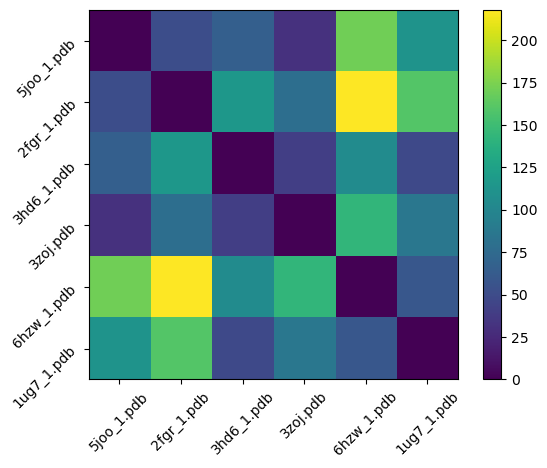

In [41]:
plt.imshow(soap_dist(test_soaps))
plt.xticks(range(6), labels=pdbs, rotation=45)
plt.yticks(range(6), labels=pdbs, rotation=45)
plt.colorbar()